In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
k12 = "".join("""GGTTAAGCGACTAAGCGTACACGGTGGATGCCCTGGCAGTCAGAGGCGATGAAGGACGTGCTAATCTGCG
ATAAGCGTCGGTAAGGTGATATGAACCGTTATAACCGGCGATTTCCGAATGGGGAAACCCAGTGTGATTC
GTCACACTATCATTAACTGAATCCATAGGTTAATGAGGCGAACCGGGGGAACTGAAACATCTAAGTACCC
CGAGGAAAAGAAATCAACCGAGATTCCCCCAGTAGCGGCGAGCGAACGGGGAGGAGCCCAGAGCCTGAAT
CAGTGTGTGTGTTAGTGGAAGCGTCTGGAAAGGCGCGCGATACAGGGTGACAGCCCCGTACACAAAAATG
CACATGCTGTGAGCTCGATGAGTAGGGCGGGACACGTGGTATCCTGTCTGAATATGGGGGGACCATCCTC
CAAGGCTAAATACTCCTGACTGACCGATAGTGAACCAGTACCGTGAGGGAAAGGCGAAAAGAACCCCGGC
GAGGGGAGTGAAAAAGAACCTGAAACCGTGTACGTACAAGCAGTGGGAGCACAGAGCAATCTGTGTGACT
GCGTACCTTTTGTATAATGGGTCAGCGACTTATATTCTGTAGCAAGGTTAACCGAATAGGGGAGCCGAAG
GGAAACCGAGTCTTAACTGGGCGTTAAGTTGCAGGGTATAGACCCGAAACCCGGTGATCTAGCCATGGGC
AGGTTGAAGGTTGGGTAACACTAACTGGAGGACCGAACCGACTAATGTTGAAAAATTAGCGGATGACTTG
TGGCTGGGGGTGAAAGGCCAATCAAACCGGGAGATAGCTGGTTCTCCCCGAAAGCTATTTAGGTAGCGCC
TCGTGAATTCATCTCCGGGGGTAGAGCACTGTTTCGGCAAGGGGGTCATCCCGACTTACCAACCCGATGC
AAACTGCGAATACCGGAGAATGTTATCACGGGAGACACACGGCGGGTGCTAACGTCCGTCGTGAAGAGGG
AAACAACCCAGACCGCCAGCTAAGGTCCCAAAGTCATGGTTAAGTGGGAAACGATGTGGGAAGGCCCAGA
CAGCCAGGATGTTGGCTTAGAAGCAGCCATCATTTAAAGAAAGCGTAATAGCTCACTGGTCGAGTCGGCC
TGCGCGGAAGATGTAACGGGGCTAAACCATGCACCGAAGCTGCGGCAGCGACACTGTGTGTTGTTGGGTA
GGGGAGCGTTCTGTAAGCCTGTGAAGGTGTGCTGTGAGGCATGCTGGAGGTATCAGAAGTGCGAATGCTG
ACATAAGTAACGATAAAGCGGGTGAAAAGCCCGCTCGCCGGAAGACCAAGGGTTCCTGTCCAACGTTAAT
CGGGGCAGGGTGAGTCGACCCCTAAGGCGAGGCCGAAAGGCGTAGTCGATGGGAAACAGGTTAATATTCC
TGTACTTGGTGTTACTGCGAAGGGGGGACGGAGAAGGCTATGTTGGCCGGGCGACGGTTGTCCCGGTTTA
AGCGTGTAGGCTGGTTTTCCAGGCAAATCCGGAAAATCAAGGCTGAGGCGTGATGACGAGGCACTACGGT
GCTGAAGCAACAAATGCCCTGCTTCCAGGAAAAGCCTCTAAGCATCAGGTAACATCAAATCGTACCCCAA
ACCGACACAGGTGGTCAGGTAGAGAATACCAAGGCGCTTGAGAGAACTCGGGTGAAGGAACTAGGCAAAA
TGGTGCCGTAACTTCGGGAGAAGGCACGCTGATATGTAGGTGAAGTCCCTCGCGGATGGAGCTGAAATCA
GTCGAAGATACCAGCTGGCTGCAACTGTTTATTAAAAACACAGCACTGTGCAAACACGAAAGTGGACGTA
TACGGTGTGACGCCTGCCCGGTGCCGGAAGGTTAATTGATGGGGTCAGCGCAAGCGAAGCTCTTGATCGA
AGCCCCGGTAAACGGCGGCCGTAACTATAACGGTCCTAAGGTAGCGAAATTCCTTGTCGGGTAAGTTCCG
ACCTGCACGAATGGCGTAATGATGGCCAGGCTGTCTCCACCCGAGACTCAGTGAAATTGAACTCGCTGTG
AAGATGCAGTGTACCCGCGGCAAGACGGAAAGACCCCGTGAACCTTTACTATAGCTTGACACTGAACATT
GAGCCTTGATGTGTAGGATAGGTGGGAGGCTTTGAAGTGTGGACGCCAGTCTGCATGGAGCCGACCTTGA
AATACCACCCTTTAATGTTTGATGTTCTAACGTGGACCCGTGATCCGGGTTGCGGACAGTGTCTGGTGGG
TAGTTTGACTGGGGCGGTCTCCTCCTAAAGAGTAACGGAGGAGCACGAAGGTTGGCTAATCCTGGTCGGA
CATCAGGAGGTTAGTGCAATGGCATAAGCCAGCTTGACTGCGAGCGTGACGGCGCGAGCAGGTGCGAAAG
CAGGTCATAGTGATCCGGTGGTTCTGAATGGAAGGGCCATCGCTCAACGGATAAAAGGTACTCCGGGGAT
AACAGGCTGATACCGCCCAAGAGTTCATATCGACGGCGGTGTTTGGCACCTCGATGTCGGCTCATCACAT
CCTGGGGCTGAAGTAGGTCCCAAGGGTATGGCTGTTCGCCATTTAAAGTGGTACGCGAGCTGGGTTTAGA
ACGTCGTGAGACAGTTCGGTCCCTATCTGCCGTGGGCGCTGGAGAACTGAGGGGGGCTGCTCCTAGTACG
AGAGGACCGGAGTGGACGCATCACTGGTGTTCGGGTTGTCATGCCAATGGCACTGCCCGGTAGCTAAATG
CGGAAGAGATAAGTGCTGAAAGCATCTAAGCACGAAACTTGCCCCGAGATGAGTTCTCCCTGACCCTTTA
AGGGTCCTGAAGGAACGTTGAAGACGACGACGTTGATAGGCCGGGTGTGTAAGCGCAGCGATGCGTTGAG
CTAACCGGTACTAATGAACCGTGAGGCTTAACCTT""".splitlines())

In [3]:
with open("../../data/reference/ATCC11775_23S.fa") as f:
    _ = next(f)
    ref = "".join(l.rstrip() for l in f)

# xPore

In [4]:
xpore_df = pd.read_csv("../../results/xpore/xpore_diffmod/diffmod.table").sort_values("position")

In [5]:
xpore_df

,id,position,kmer,diff_mod_rate_control_vs_test,pval_control_vs_test,z_score_control_vs_test,mod_rate_control-0,mod_rate_test-0,coverage_control-0,coverage_test-0,mu_unmod,mu_mod,sigma2_unmod,sigma2_mod,conf_mu_unmod,conf_mu_mod,mod_assignment
247,ATCC11775_23S_rRNA,3,GTTAA,-0.107007,6.078038e-07,-4.988721,0.822344,0.929351,889.0,222.0,82.918308,80.904311,4.913172,0.989873,0.928193,0.363447,lower
887,ATCC11775_23S_rRNA,12,CTAAG,0.023612,1.297140e-01,1.515231,0.152904,0.129292,997.0,997.0,95.248158,87.569098,2.412901,4.727155,0.215151,0.198275,lower
700,ATCC11775_23S_rRNA,13,TAAGC,0.017817,4.258629e-01,0.796291,0.537984,0.520166,994.0,996.0,102.088343,97.950701,18.651894,2.417355,0.900359,0.371367,lower
351,ATCC11775_23S_rRNA,19,TACAC,-0.005088,4.954652e-01,-0.681642,0.026009,0.031097,998.0,993.0,86.128188,81.772005,5.241543,18.151379,0.548467,0.441413,lower
462,ATCC11775_23S_rRNA,24,GGTGG,-0.041918,3.300147e-02,-2.132065,0.719623,0.761541,988.0,996.0,101.214544,93.556077,45.196198,7.640006,0.857125,0.541655,lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,ATCC11775_23S_rRNA,2875,CCGGT,-0.087869,2.857383e-01,-1.067517,0.125169,0.213039,17.0,502.0,104.273945,90.166591,11.457163,9.126269,0.215069,0.111148,lower
13,ATCC11775_23S_rRNA,2876,CGGTA,-0.102720,4.200267e-01,-0.806375,0.499352,0.602072,16.0,398.0,119.278742,125.679995,35.378620,6.752343,0.445473,0.255749,higher
881,ATCC11775_23S_rRNA,2881,CTAAT,-0.241354,2.175708e-37,-12.778008,0.000062,0.241417,16.0,519.0,98.940508,92.418840,8.115645,5.964507,0.461117,0.159049,lower
482,ATCC11775_23S_rRNA,2884,ATGAA,-0.079486,2.547101e-01,-1.138983,0.073718,0.153204,15.0,408.0,98.151006,88.819598,14.918534,34.441583,0.426425,0.199513,lower


Text(0, 0.5, 'Differential modification rate')

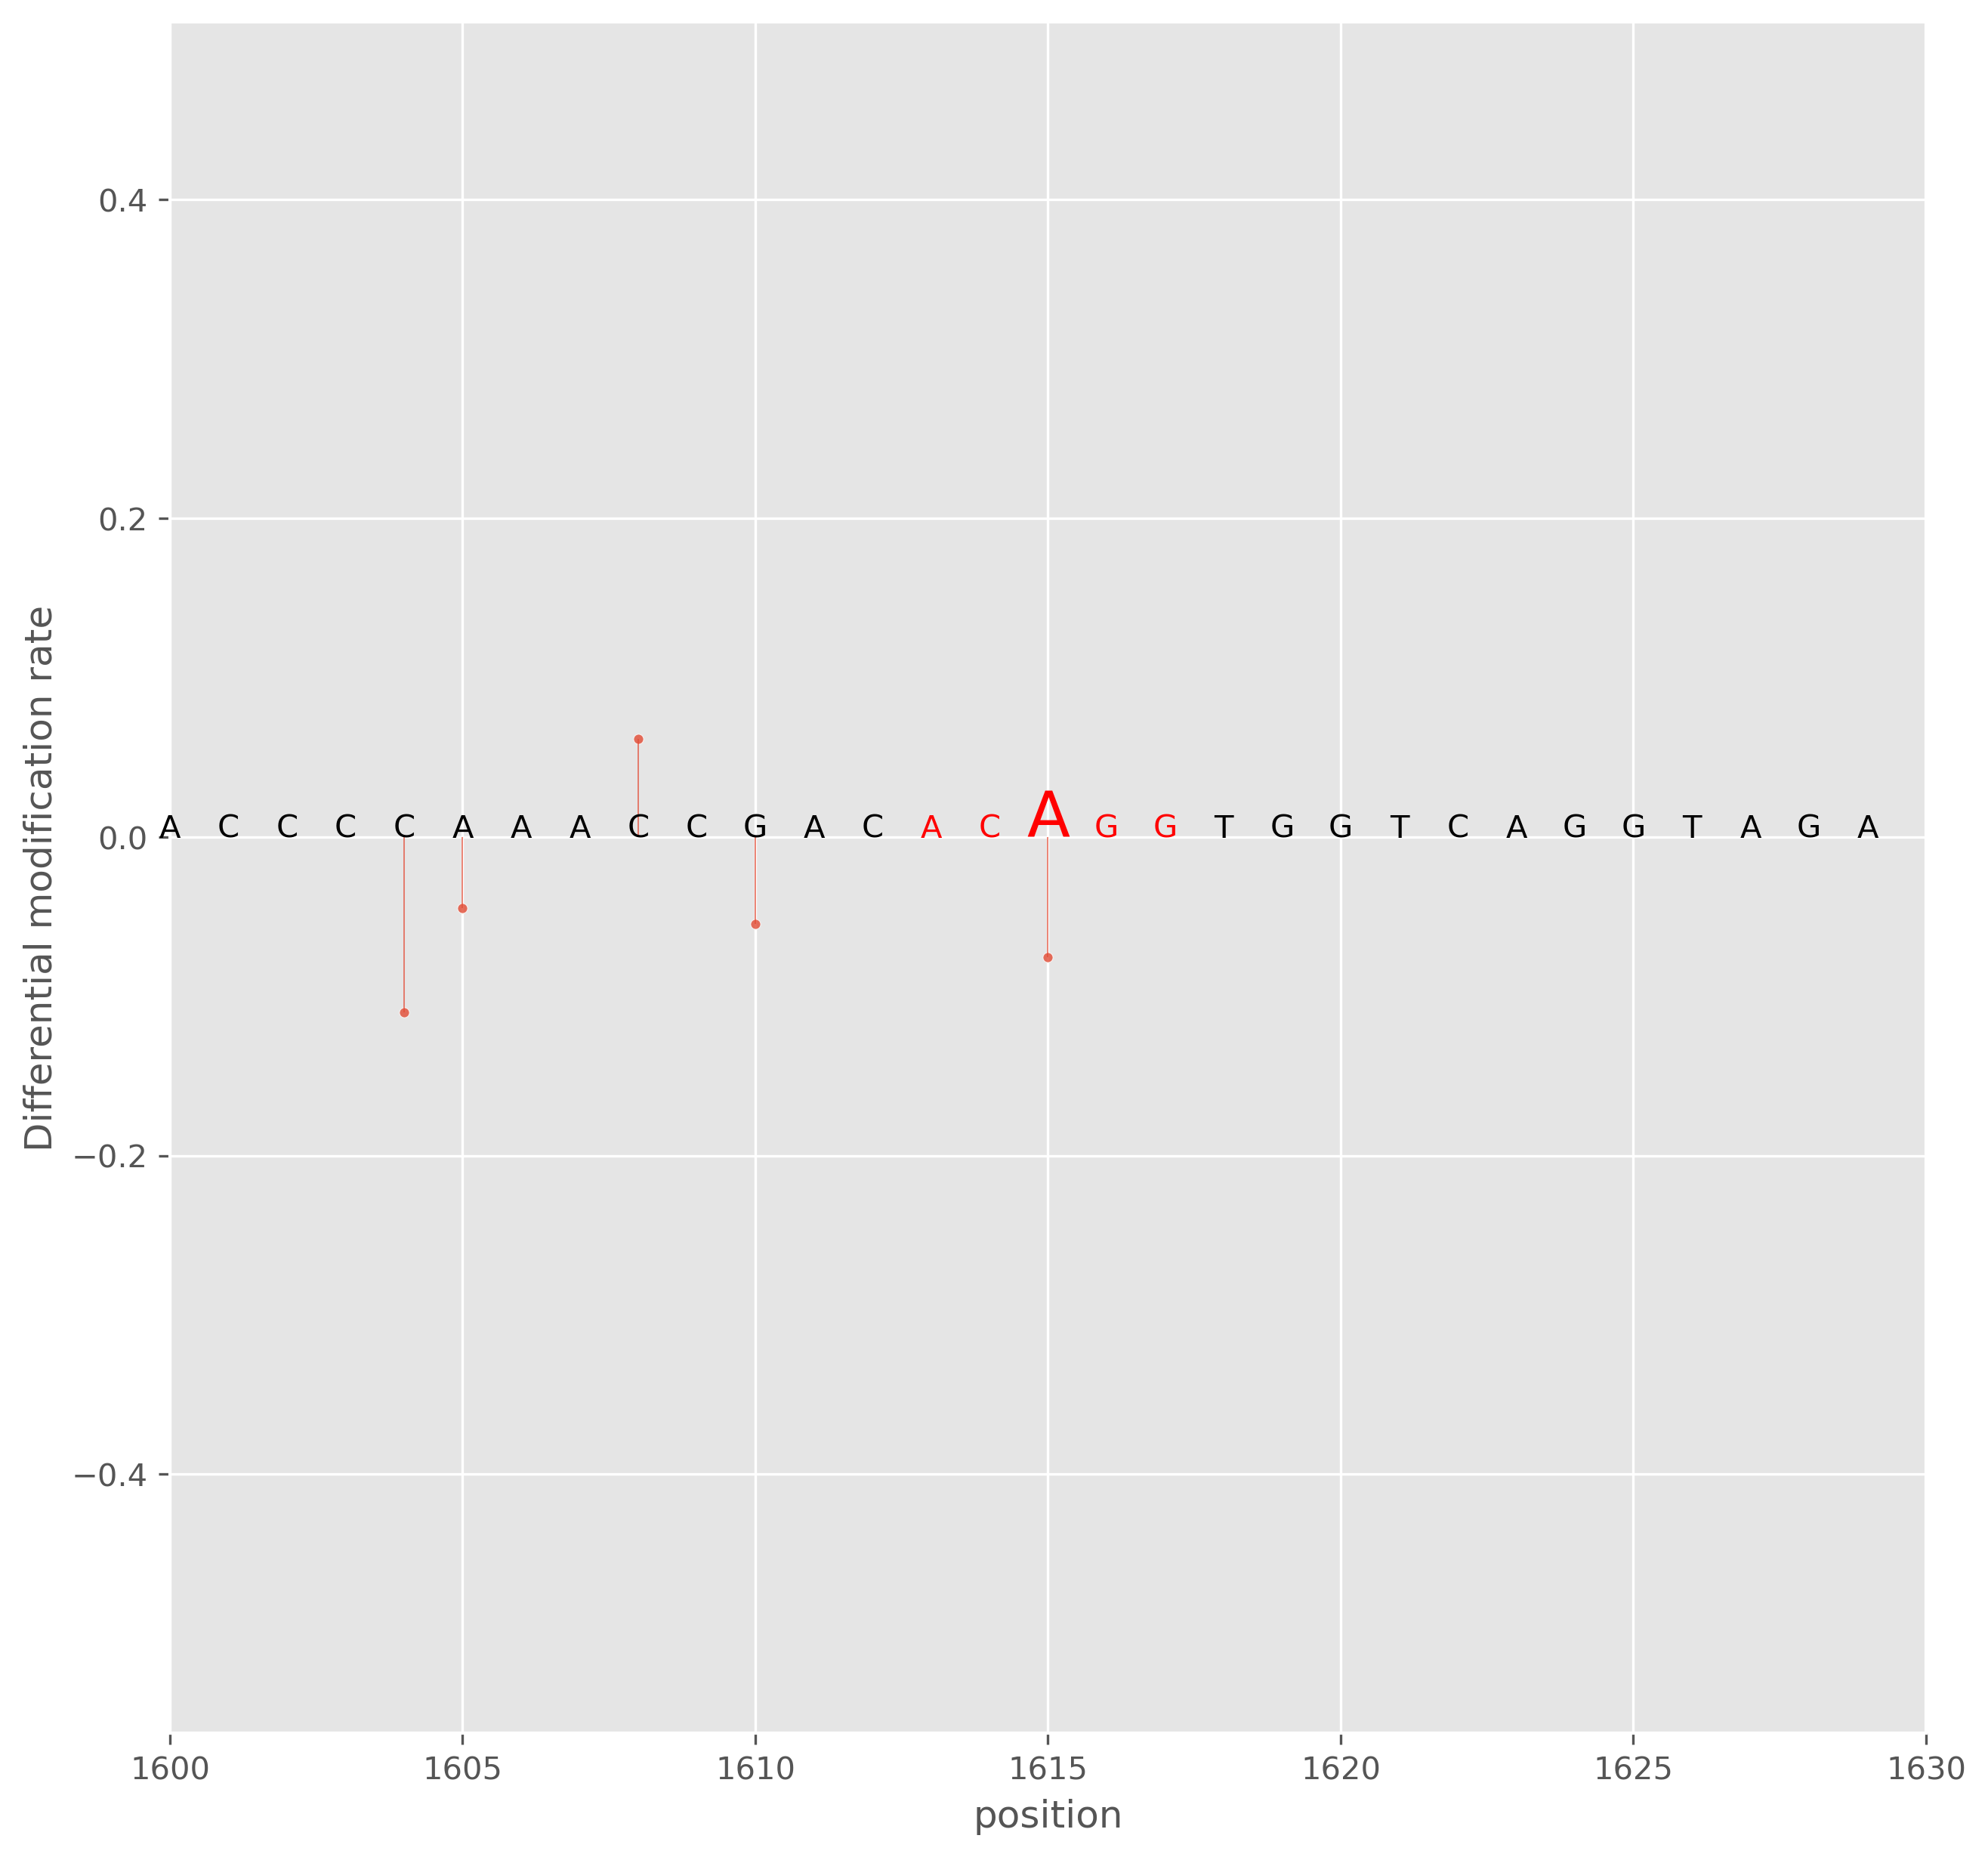

In [15]:
x = "position"
y = "diff_mod_rate_control_vs_test"
data = xpore_df.query("pval_control_vs_test < 0.05")
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
# fig = plt.figure(figsize=(10,7))
sns.scatterplot(data=data, x=x, y=y, ax=ax, s=10, alpha=0.8)
ys = data[y]
xs = data[x]
ax.vlines(x=xs, ymax=ys, ymin=0, linewidth=0.4, alpha =0.8)
# labels = np.array(list(ref))[xs]
# ax.set_xticklabels(labels)
xlim = (1600, 1630)
ax.set_xlim((xlim))
for pos in range(*xlim):
    base = ref[pos]
    if pos == 1615:
        ax.text(x=pos, y=0, s=base, horizontalalignment='center', color="red", fontsize=20)
    elif 1612 < pos < 1618: 
        ax.text(x=pos, y=0, s=base, horizontalalignment='center', color="red")
    else:
        ax.text(x=pos, y=0, s=base, horizontalalignment='center')
# ax.set_yscale("logit")
ax.set_ylabel("Differential modification rate")

In [16]:
fig.savefig("xpore_rlmF_diffmod.eps")
fig.savefig("xpore_rlmF_diffmod.svg")
fig.savefig("xpore_rlmF_diffmod.png")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [7]:
xpore_df.query("kmer == 'ACAGG'")

,id,position,kmer,diff_mod_rate_control_vs_test,pval_control_vs_test,z_score_control_vs_test,mod_rate_control-0,mod_rate_test-0,coverage_control-0,coverage_test-0,mu_unmod,mu_mod,sigma2_unmod,sigma2_mod,conf_mu_unmod,conf_mu_mod,mod_assignment
818,ATCC11775_23S_rRNA,1384,ACAGG,-0.065418,0.039934,-2.054429,0.428910,0.494328,364.0,733.0,83.259723,89.157835,5.372503,22.919337,0.853441,0.330039,higher
615,ATCC11775_23S_rRNA,1615,ACAGG,-0.075473,0.019703,-2.331958,0.306625,0.382098,294.0,728.0,78.083010,94.803998,14.978305,16.325690,0.229454,0.037224,higher
560,ATCC11775_23S_rRNA,2452,ACAGG,0.132312,0.019299,2.339705,0.642180,0.509868,81.0,692.0,81.692274,90.764905,8.113214,27.990695,0.622241,0.197132,higher


In [8]:
k12[1615:1622]

'CACAGGT'

In [9]:
ref.index("ACAGGT")

1382

In [10]:
k12[1380:1391]

'GGGAAACAGGT'

# Nanocompore
https://github.com/tleonardi/nanocompore/issues/123#issuecomment-590458557 gives an overview of what each column means.

In [11]:
ncomp_df = pd.read_csv("../../results/nanocompore/nanocompore_sampcomp/outnanocompore_results.tsv", delimiter="\t")

In [12]:
ncomp_df

,pos,chr,genomicPos,ref_id,strand,ref_kmer,GMM_logit_pvalue,GMM_logit_pvalue_context_2,KS_dwell_pvalue,KS_dwell_pvalue_context_2,KS_intensity_pvalue,KS_intensity_pvalue_context_2,GMM_cov_type,GMM_n_clust,cluster_counts,Logit_LOR
0,5,NaN,NaN,ATCC11775_23S_rRNA,NaN,AGCGA,0.308840,0.507399,0.671134,0.685453,0.359367,0.613927,full,2,control_1:49/27__test_1:59/14,-0.8064758658669486
1,6,NaN,NaN,ATCC11775_23S_rRNA,NaN,GCGAC,NaN,NaN,0.894056,0.551286,0.712451,0.552911,full,1,NC,NC
2,7,NaN,NaN,ATCC11775_23S_rRNA,NaN,CGACT,NaN,NaN,0.470398,0.344311,0.784757,0.381187,full,1,NC,NC
3,8,NaN,NaN,ATCC11775_23S_rRNA,NaN,GACTA,0.595639,0.722512,0.563447,0.420550,0.268863,0.252033,full,2,control_1:72/21__test_1:82/14,-0.5113734189043129
4,9,NaN,NaN,ATCC11775_23S_rRNA,NaN,ACTAA,0.907318,0.747600,0.998161,0.639943,0.250051,0.241122,full,2,control_1:13/81__test_1:16/84,-0.15822400521489463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,2895,NaN,NaN,ATCC11775_23S_rRNA,NaN,CTTAA,0.355714,0.010688,0.818883,0.033507,0.231542,0.002305,full,2,control_1:1951/372__test_1:1865/417,0.15896039844668966
2891,2896,NaN,NaN,ATCC11775_23S_rRNA,NaN,TTAAC,0.732008,0.511746,0.700344,0.545703,0.249606,0.006248,full,2,control_1:740/1548__test_1:743/1462,-0.061160848933748284
2892,2897,NaN,NaN,ATCC11775_23S_rRNA,NaN,TAACC,0.841739,0.553685,0.820826,0.722814,0.268323,0.030140,full,2,control_1:1681/642__test_1:1577/628,0.041811871589895876
2893,2898,NaN,NaN,ATCC11775_23S_rRNA,NaN,AACCT,0.907318,0.745735,0.694833,0.753127,0.113168,0.029375,full,2,control_1:929/1337__test_1:895/1320,0.024457237006522244


Text(0.5, 0, 'GMM Logistic log odds ratio')

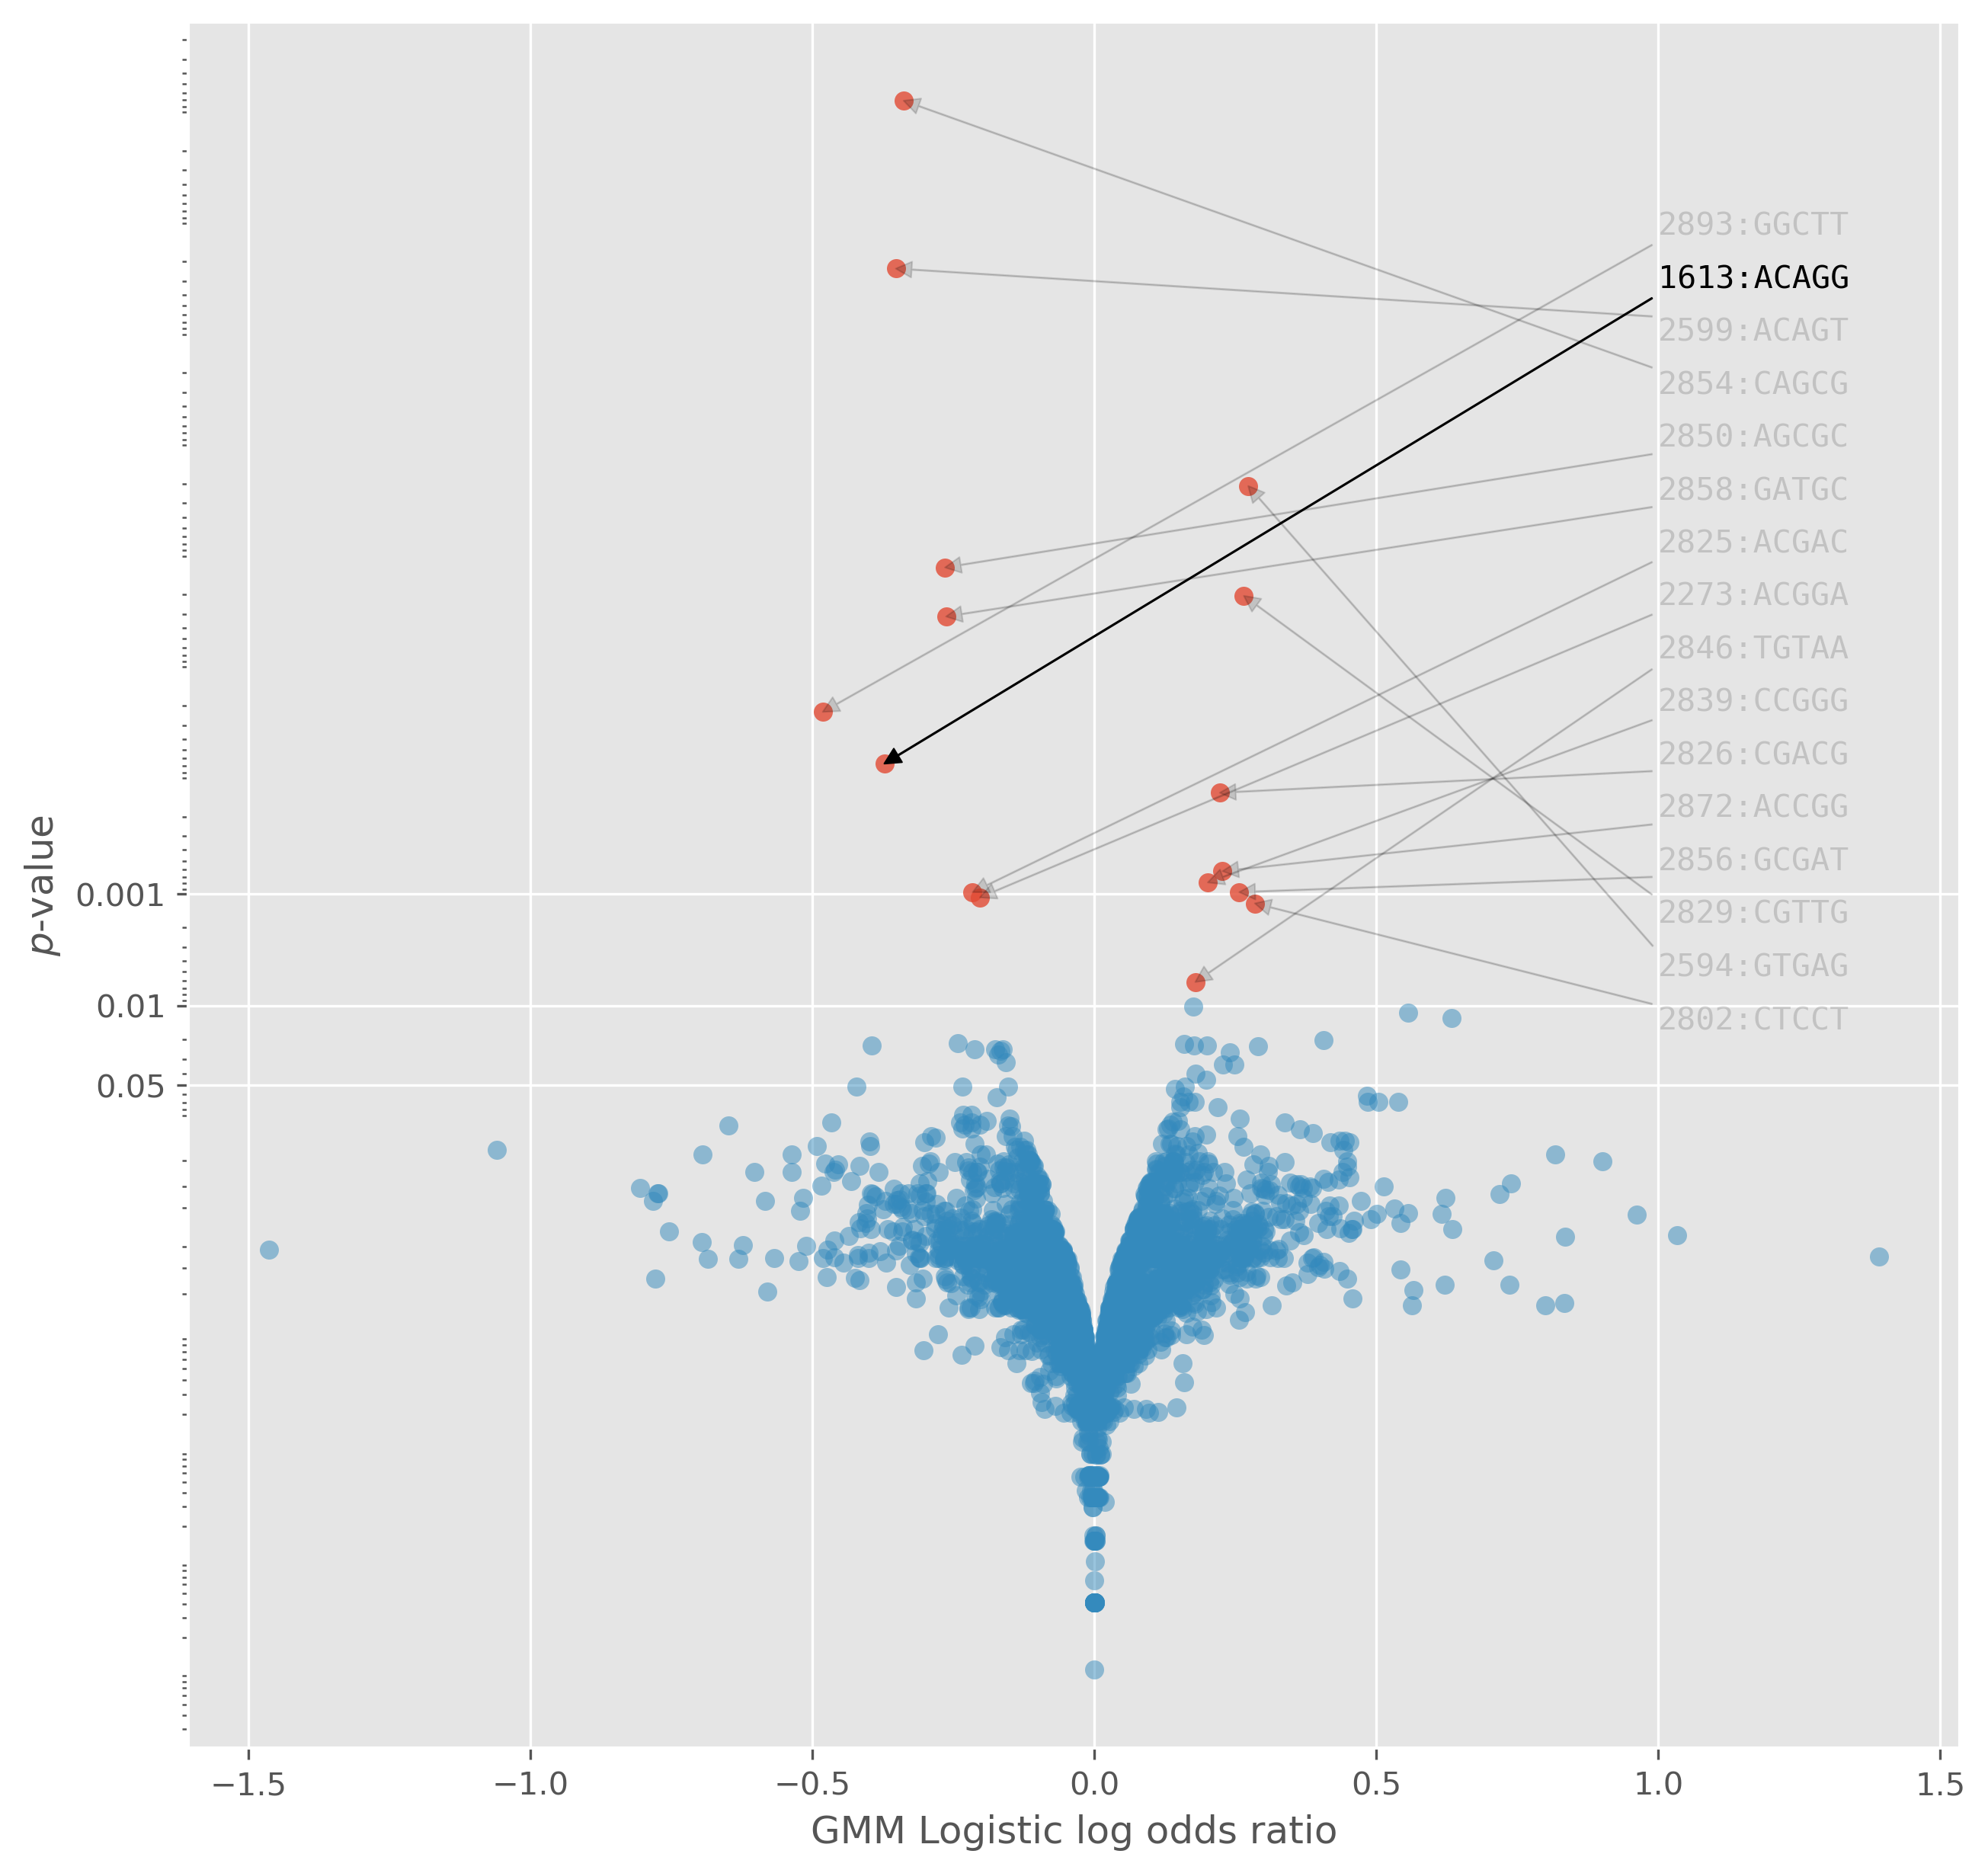

In [136]:
sig_p = 0.01
x = "Logit_LOR"
ncomp_df[x] = ncomp_df[x].replace('NC', np.NaN).astype(float)
y = "GMM_logit_pvalue"
data = ncomp_df.query("GMM_logit_pvalue < @sig_p")
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
sns.scatterplot(data=data, x=x, y=y, linewidth=0, ax=ax, alpha=0.8)
labels = []
ypos = 0.01
xpos = 1.0
for _, row in data.sort_values(x, ascending=False).iterrows():
    label = f'{row["pos"]}:{row["ref_kmer"]}'
    xx = row[x]
    yy = row[y]
    kmer = row["ref_kmer"]
    alpha = 1 if kmer == "ACAGG" else 0.15
    ax.annotate(label, 
                xy=(xx, yy), xycoords='data', 
                font="monospace",
                xytext=(xpos, ypos), textcoords='data', alpha=alpha,
                horizontalalignment="left",
                verticalalignment="top",
                arrowprops=dict( 
                    color="black", 
                    alpha=alpha, 
#                     shrink=0.1, 
                    width=0.25, 
                    headlength=5, 
                    headwidth=5,
                ))
    ypos = ypos/3

    
data = ncomp_df.query("GMM_logit_pvalue >= @sig_p")
sns.scatterplot(data=data, x=x, y=y, linewidth=0, alpha=0.5, ax=ax)

ax.invert_yaxis()
ax.set_yscale("logit")
ticks = [0.05, 0.01, 0.001]
ax.set_yticks(ticks)
ax.set_yticklabels(ticks)
ax.set_ylabel("$p$-value")
ax.set_xlabel("GMM Logistic log odds ratio")

In [31]:
ncomp_df.query("GMM_logit_pvalue < 0.01")

,pos,chr,genomicPos,ref_id,strand,ref_kmer,GMM_logit_pvalue,GMM_logit_pvalue_context_2,KS_dwell_pvalue,KS_dwell_pvalue_context_2,KS_intensity_pvalue,KS_intensity_pvalue_context_2,GMM_cov_type,GMM_n_clust,cluster_counts,Logit_LOR
1608,1613,NaN,NaN,ATCC11775_23S_rRNA,NaN,ACAGG,6.671386e-05,2.803727e-06,8.125351e-01,1.723267e-02,7.492529e-06,9.276245e-15,full,2,control_1:554/1003__test_1:775/966,-0.372733
2268,2273,NaN,NaN,ATCC11775_23S_rRNA,NaN,ACGGA,1.070742e-03,2.906343e-04,1.723077e-01,3.350692e-02,1.497007e-01,2.974540e-03,full,2,control_1:1757/2046__test_1:2191/2082,-0.203204
2589,2594,NaN,NaN,ATCC11775_23S_rRNA,NaN,GTGAG,2.098756e-07,1.339502e-10,1.233863e-05,3.063951e-09,3.153747e-05,1.617721e-10,full,2,control_1:1872/2471__test_1:1733/3005,0.272693
2594,2599,NaN,NaN,ATCC11775_23S_rRNA,NaN,ACAGT,2.306679e-09,1.606195e-12,9.981609e-01,5.938703e-01,6.529854e-13,4.186383e-37,full,2,control_1:2121/1255__test_1:2782/1157,-0.352408
2797,2802,NaN,NaN,ATCC11775_23S_rRNA,NaN,CTCCT,1.210170e-03,8.635769e-05,1.580146e-02,3.336278e-03,1.392207e-01,5.296969e-05,full,2,control_1:3653/499__test_1:3821/694,0.284352
2820,2825,NaN,NaN,ATCC11775_23S_rRNA,NaN,ACGAC,9.592055e-04,2.300798e-08,2.986534e-01,3.230521e-03,1.583758e-03,3.009921e-05,full,2,control_1:1123/3154__test_1:1426/3226,-0.216116
2821,2826,NaN,NaN,ATCC11775_23S_rRNA,NaN,CGACG,1.220177e-04,1.065013e-09,5.507626e-03,8.031143e-05,3.454748e-03,9.528482e-06,full,2,control_1:2691/1539__test_1:2674/1910,0.222179
2824,2829,NaN,NaN,ATCC11775_23S_rRNA,NaN,CGTTG,2.051267e-06,6.489600e-09,1.851398e-04,1.173208e-06,2.701311e-01,2.052886e-02,full,2,control_1:2969/1323__test_1:2944/1710,0.264874
2834,2839,NaN,NaN,ATCC11775_23S_rRNA,NaN,CCGGG,7.847667e-04,1.015075e-07,1.100974e-03,5.533632e-08,1.681279e-01,3.040409e-10,full,2,control_1:2540/1718__test_1:2509/2075,0.200975
2841,2846,NaN,NaN,ATCC11775_23S_rRNA,NaN,TGTAA,6.158270e-03,7.073287e-05,9.397035e-01,1.897807e-02,4.894103e-09,8.881218e-14,full,2,control_1:2524/1715__test_1:2508/2038,0.178820


In [52]:
text_positions

NameError: name 'text_positions' is not defined